# Maximum entropy principle

Florent Leclercq,<br/>
Imperial Centre for Inference and Cosmology, Imperial College London,<br/>
florent.leclercq@polytechnique.org

In [1]:
from scipy.optimize import fsolve
from math import log, pow
import numpy as np
import matplotlib.pyplot as plt

## Dice example

The constraints are $\sum_{n=1}^{6} n p_n = 4$ (contraint on the mean) and $\sum_{n=1}^{6} p_n = 1$ (normalization constraint). The Lagrangian is
\begin{equation}
\mathcal{L}[\{p_n\},\lambda,\mu] = - \sum_{n=1}^{6} p_n \ln p_n - \lambda \left( \sum_{n=1}^{6} n p_n - 4 \right) - \mu \left( \sum_{n=1}^{6} - 1 \right).
\end{equation}

In [2]:
mean=4

$\dfrac{\partial \mathcal{L}}{\partial p_n} =0$ fixes $p_n = \dfrac{\mathrm{e}^{-\lambda n}}{Z} = \dfrac{x^{-n}}{Z}$ (we define $x \equiv \mathrm{e}^\lambda$).

In [3]:
def p1(x):
    return pow(x,-1)/Z(x)
def p2(x):
    return pow(x,-2)/Z(x)
def p3(x):
    return pow(x,-3)/Z(x)
def p4(x):
    return pow(x,-4)/Z(x)
def p5(x):
    return pow(x,-5)/Z(x)
def p6(x):
    return pow(x,-6)/Z(x)

The normalization constraint $\sum_{n=1}^{6} p_n = 1$ fixes
\begin{equation}
Z = \sum_{n=1}^{6} \mathrm{e}^{-\lambda n} = \dfrac{1-\mathrm{e}^{-6\lambda}}{\mathrm{e}^\lambda-1} = \dfrac{1-x^{-6}}{x-1}.
\end{equation}

In [4]:
def Z(x):
    return (1-pow(x,-6))/(x-1)

The constraint on the mean is obtained by noting that
\begin{equation}
- \frac{\mathrm{d} \ln Z}{\mathrm{d} \lambda} = -\frac{1}{Z} \frac{\mathrm{d}Z}{\mathrm{d}\lambda} = \sum_{n=1}^6 n \frac{\mathrm{e}^{-\lambda n}}{Z} = \sum_{n=1}^6 n \, p_n = 4.
\end{equation}
This gives an equation for $\lambda$: $\mathrm{e}^\lambda/(\mathrm{e}^\lambda-1) - 6/(\mathrm{e}^{6\lambda}-1)= 4$. 

In [5]:
# we now solve the equation giving x=exp(lambda)
def f(x):
    return x/(x-1) - 6/(pow(x,6)-1) - mean
    # This is -dlnZ/dZ-mean, which should be 0
x0=fsolve(f,2)[0]
x0

0.8397685748659793

In [6]:
# using the solution for x, we have the probability assignment:
pn = (p1(x0), p2(x0), p3(x0), p4(x0), p5(x0), p6(x0))
pn

(0.10306524522362508,
 0.12273053351641969,
 0.14614804267474113,
 0.17403371244043664,
 0.20724008691110057,
 0.246782379233677)

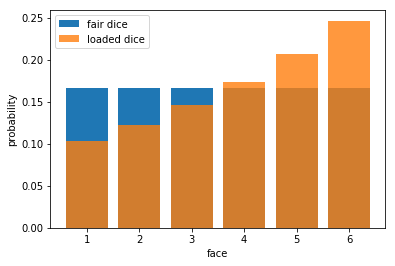

In [7]:
plt.bar(np.arange(1,7),1/6.,label="fair dice")
plt.bar(np.arange(1,7),pn,label="loaded dice",alpha=0.8)
plt.xlabel("face")
plt.ylabel("probability")
plt.legend()

In [8]:
# check normalization constraint
p1(x0)+p2(x0)+p3(x0)+p4(x0)+p5(x0)+p6(x0)

1.0

In [9]:
# check mean constraint
1*p1(x0)+2*p2(x0)+3*p3(x0)+4*p4(x0)+5*p5(x0)+6*p6(x0)

3.999999999999999

## Cosmic web example

The cosmic web is described by four possible structures ($\theta_0=$ void, $\theta_1=$ sheet, $\theta_2=$ filament, and $\theta_3=$ cluster. We are looking for the prior probabilities $p_n$ ($n = 0, ..., 3$) that one should assign to each of these structures. Let us assume that we have measured in astronomical observations the (average) volume of structures:

In [10]:
# Volume of the different structures (arbitrary normalization)
# (based on numbers given in table II in Leclercq et al. 2015a, arXiv:1502.02690)
V0 = 60
V1 = 20
V2 = 8
V3 = 1

The cosmological principle states that there cannot be cosmological structures at arbitrary large scales (the "End of Greatness"); let us say that this imposes the average volume of a random cosmic web element to be:

In [11]:
# The average volume of a random cosmic web structure
V = 30

Just on the basis of these observations, the maximum entropy principle fixes the new prior probabilities $p_n$ that one should use. They are given in canonical notations as $p_n = \mathrm{e}^{-\beta V_n}/Z$ with $Z=\sum_n \mathrm{e}^{-\beta V_n}$.

In [12]:
# x=exp(-beta) in the usual thermodynamic notations
def Z(x):
    return pow(x,V0)+pow(x,V1)+pow(x,V2)+pow(x,V3)
def p0(x):
    return pow(x,V0)/Z(x)
def p1(x):
    return pow(x,V1)/Z(x)
def p2(x):
    return pow(x,V2)/Z(x)
def p3(x):
    return pow(x,V3)/Z(x)
def dlnZdx(x):
    return p0(x)*V0+p1(x)*V1+p2(x)*V2+p3(x)*V3

Solving $\left\langle V \right\rangle = -\partial Z/\partial \beta = \bar{V}$ fixes $\beta$:

In [13]:
def f(x):
    return dlnZdx(x)-V
x0=fsolve(f,0.9)[0]
x0

1.0134673199344182

The solution is therefore:

In [14]:
P0=p0(x0); P1=p1(x0); P2=p2(x0); P3=p3(x0)
P0,P1,P2,P3

(0.39392560584840686,
 0.23068759870801528,
 0.19647498278472048,
 0.17891181265885733)

In [15]:
# check normalization constraint
P0+P1+P2+P3

1.0

In [16]:
# check average volume constraint
P0*V0+P1*V1+P2*V2+P3*V3

30.000000000001336